In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def parse_files(root, num):
  xtilda =  []
  labels = []
  label = 0
  for i in range(1, (num*10)+1):
    pixels = plt.imread(root+str(i)+'.jpg')
    pixels = [x / 255 for x in pixels]
    pixels = np.append(pixels, 1)
    xtilda.append(pixels)
    
    # labels are added according to the filename 
    if(i%num == 0):
      label = (i//num)-1
    else:
      label = i//num

    labels.append(label)


  xtilda = np.array(xtilda)  
#   delete the ones column
  xtilda = np.delete(xtilda, 784, axis=1)
  labels = np.array(labels)
  return xtilda, labels

In [6]:
x_train, labels = parse_files('C:\\Users\\Sarah\\Desktop\\Assignment2 ML\\Train\\', 240)

In [7]:
def get_info(x_train):
    parts = np.split(x_train, 10)
    means = []
    stds = []
    for i in range(0, 10):
        means.append(np.mean(parts[i], axis=0))
        stds.append(np.std(parts[i], axis=0))
    stds = np.array(stds)
    variances = np.square(stds)    
    means = np.array(means)
    for i in range(len(variances)):
        for j in range(len(variances[i])):
            if(variances[i][j]<0.01):
                variances[i][j]=0.01
    return means, variances

In [8]:
means, variances = get_info(x_train)
x_test, true_labels = parse_files('C:\\Users\\Sarah\\Desktop\\Assignment2 ML\\Test\\', 20)
predicted_labels=[]
for i in range(0,200):
    probs = []
    for j in range(0,10):
        n = np.exp(-((x_test[i]-means[j])**2)/(2*variances[j]))
        g = n/(np.sqrt(2*np.pi*variances[j]))
        g = np.array(g)
        result = np.prod(g)
        probs += [result]
        label = np.argmax(probs)
    predicted_labels.append(label)
predicted_labels = np.array(predicted_labels)
predicted_labels  

C:\Users\Sarah\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 6, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 2, 2,
       2, 2, 2, 2, 5, 2, 2, 2, 9, 6, 2, 2, 2, 2, 2, 2, 8, 8, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 4, 9, 4, 4, 6, 4, 6, 4,
       4, 4, 4, 4, 9, 9, 6, 4, 4, 8, 4, 9, 8, 5, 8, 5, 5, 8, 5, 5, 5, 9,
       4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 9, 4, 9,
       4, 9, 9, 7, 7, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8,
       9, 8, 8, 8, 9, 9, 9, 0, 7, 9, 3, 8, 9, 9, 9, 9, 9, 9, 9, 4, 4, 4,
       9, 9], dtype=int64)

In [9]:
def get_cm(true, predicted):
  n = np.unique(true).size
  cm = np.zeros(n*n).reshape(n, n)
  for i in range(0, true.size):
    cm[true[i]][predicted[i]]+=1
    
  cm = cm.astype(int)
  return cm

In [10]:
def plot_cm(cm, classes):

  fig, ax = plt.subplots(figsize=(10,10))
  im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  ax.figure.colorbar(im, ax=ax)
  # We want to show all ticks...
  ax.set(xticks=np.arange(cm.shape[1]),
         yticks=np.arange(cm.shape[0]),
         # ... and label them with the respective list entries
         xticklabels=classes, yticklabels=classes,
         title= 'Confusion Matrix',
         ylabel='True label',
         xlabel='Predicted label')
  ax.set_ylim(len(cm)-0.5, -0.5)

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
           rotation_mode="anchor")

  # Loop over data dimensions and create text annotations.
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], 'd'),
                  ha="center", va="center",
                  color="white" if cm[i, j] > thresh else "black")
  fig.tight_layout()
  plt.savefig('Confusion-Gauss.jpg')
  

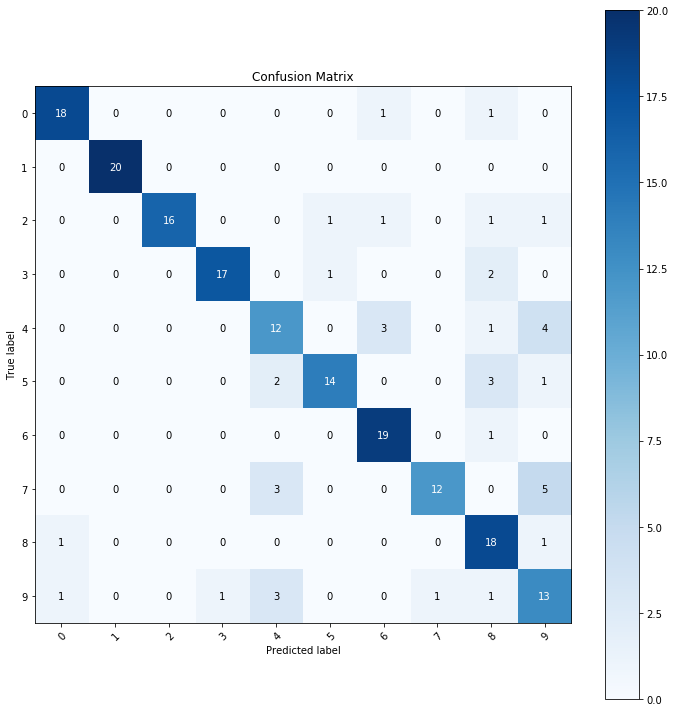

In [11]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cm = get_cm(true_labels, predicted_labels)
plot_cm(cm, classes)